In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from IPython.display import display
from wordcloud import WordCloud

from PIL import Image


In [3]:
tweets = pd.read_csv('/content/Tweets 300 en ingles.csv')

display(tweets)

,Fecha,Genero,Commnet
0,02/01/24,Hombre,My passage through Mexico was complicated.
1,05/16/24,Mujer,"The authorities were kind, but the risks on th..."
2,05/04/24,Mujer,I hope to reach my destination in Mexico; it h...
3,07/10/24,Mujer,"Every day in Mexico is a new challenge, but ea..."
4,01/21/24,Hombre,My passage through Mexico has taught me to be ...
...,...,...,...
294,07/02/24,Mujer,The solidarity of some Mexicans has been unexp...
295,01/20/24,Hombre,"The days pass slowly and full of challenges, b..."
296,08/15/24,Hombre,"Despite everything, I still believe that I wil..."
297,12/07/24,Mujer,"I have been robbed on the way, but I have not ..."


In [4]:
tweets.rename(columns={'Commnet': 'comment'}, inplace=True)

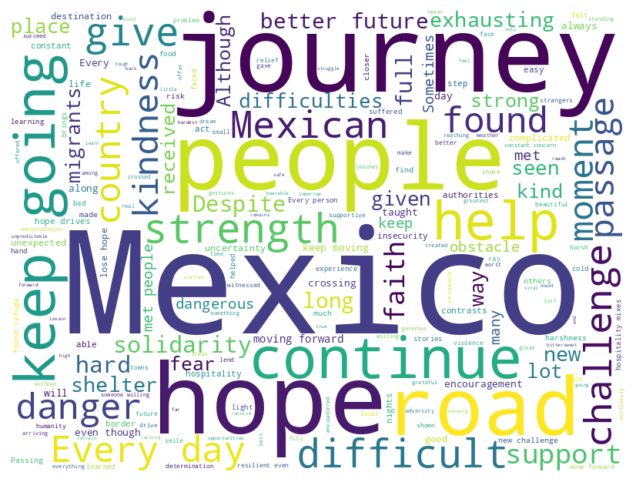

<Figure size 640x480 with 0 Axes>

In [5]:
# Función para generar la nube de palabras
def word_cloud(words):
    wordcloud = WordCloud(width=800, height=600, random_state=21, relative_scaling=0.5, background_color="white").generate(words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Prepara el texto concatenando los comentarios
word_set = ' '.join([tweet for tweet in tweets['comment'].dropna()])

# Genera la nube de palabras
word_cloud(word_set)

# Guarda la imagen de la nube de palabras
plt.savefig('word_cloud.jpg')


Análisis de la nube de palabras
Términos principales:

Las palabras como "Mexico," "journey," "people," "hope," "road," y "strength" son las más destacadas. Esto sugiere que los temas de viaje, esperanza, y fortaleza son centrales en los comentarios.
Otros términos importantes incluyen "keep," "going," "difficult," "support," y "danger," lo que indica que los comentarios podrían estar hablando de desafíos y apoyo.
Temática general:

Los términos más destacados parecen girar en torno a la experiencia de viaje (como "journey" y "road") y a la situación en México. Palabras como "hope" y "strength" sugieren un enfoque en la resiliencia y el esfuerzo por seguir adelante a pesar de las dificultades.
Las palabras relacionadas con sentimientos de desafío o riesgo ("difficult," "danger," "challenge") también sugieren que los comentarios pueden abordar temas difíciles y situaciones peligrosas.
Posibles temas adicionales:

Solidaridad y apoyo: Palabras como "support," "help," "kindness," y "solidarity" indican menciones de ayuda y solidaridad, quizás refiriéndose a actos de apoyo recibidos o dados durante el viaje.
Desafíos y peligro: Palabras como "danger," "challenge," y "obstacle" sugieren que muchos comentarios podrían estar resaltando las dificultades que enfrentan los migrantes.

In [6]:
# Lista de palabras que quieres buscar en los comentarios
similar_words = [
    "hope", "strength", "struggle", "perseverance", "resilience", "endurance",
    "hardship", "survival", "challenge", "fear", "dangerous", "obstacle",
    "solidarity", "aid", "help", "kindness", "faith", "uncertainty", "tough",
    "compassion", "patience", "exhaustion", "support", "relief", "danger",
    "courage", "determination", "persist", "resist", "trust", "overcome",
    "stay strong", "keep going", "move forward", "carry on", "push through"
]

# Función para encontrar palabras similares en cada comentario
def find_similar_words(text):
    # Convierte el comentario en minúsculas y revisa si contiene alguna de las palabras en similar_words
    found_words = [word for word in similar_words if word in text.lower()]
    # Retorna las palabras encontradas como una cadena de texto o un valor vacío si no hay coincidencias
    return ', '.join(found_words) if found_words else None

# Crea la nueva columna 'found_words' aplicando la función a cada comentario
tweets['found_words'] = tweets['comment'].apply(find_similar_words)

# Visualiza el DataFrame para ver los resultados
display(tweets[['comment', 'found_words']].head(300))


,comment,found_words
0,My passage through Mexico was complicated.,None
1,"The authorities were kind, but the risks on th...",None
2,I hope to reach my destination in Mexico; it h...,"hope, challenge, help"
3,"Every day in Mexico is a new challenge, but ea...",challenge
4,My passage through Mexico has taught me to be ...,"kindness, trust"
...,...,...
294,The solidarity of some Mexicans has been unexp...,solidarity
295,"The days pass slowly and full of challenges, b...","hope, challenge"
296,"Despite everything, I still believe that I wil...",None
297,"I have been robbed on the way, but I have not ...",hope


In [7]:
tweets

,Fecha,Genero,comment,found_words
0,02/01/24,Hombre,My passage through Mexico was complicated.,None
1,05/16/24,Mujer,"The authorities were kind, but the risks on th...",None
2,05/04/24,Mujer,I hope to reach my destination in Mexico; it h...,"hope, challenge, help"
3,07/10/24,Mujer,"Every day in Mexico is a new challenge, but ea...",challenge
4,01/21/24,Hombre,My passage through Mexico has taught me to be ...,"kindness, trust"
...,...,...,...,...
294,07/02/24,Mujer,The solidarity of some Mexicans has been unexp...,solidarity
295,01/20/24,Hombre,"The days pass slowly and full of challenges, b...","hope, challenge"
296,08/15/24,Hombre,"Despite everything, I still believe that I wil...",None
297,12/07/24,Mujer,"I have been robbed on the way, but I have not ...",hope


In [8]:
# Contar los valores None en la columna 'found_words'
none_count = tweets['found_words'].isna().sum()

print(f"Cantidad de comentarios sin palabras encontradas: {none_count}")

Cantidad de comentarios sin palabras encontradas: 73


In [9]:
# Reemplazar None por NaN en la columna 'found_words'
tweets['found_words'] = tweets['found_words'].replace({None: np.nan})

# Verificar los resultados
tweets

,Fecha,Genero,comment,found_words
0,02/01/24,Hombre,My passage through Mexico was complicated.,NaN
1,05/16/24,Mujer,"The authorities were kind, but the risks on th...",NaN
2,05/04/24,Mujer,I hope to reach my destination in Mexico; it h...,"hope, challenge, help"
3,07/10/24,Mujer,"Every day in Mexico is a new challenge, but ea...",challenge
4,01/21/24,Hombre,My passage through Mexico has taught me to be ...,"kindness, trust"
...,...,...,...,...
294,07/02/24,Mujer,The solidarity of some Mexicans has been unexp...,solidarity
295,01/20/24,Hombre,"The days pass slowly and full of challenges, b...","hope, challenge"
296,08/15/24,Hombre,"Despite everything, I still believe that I wil...",NaN
297,12/07/24,Mujer,"I have been robbed on the way, but I have not ...",hope


In [10]:
# Crear un nuevo DataFrame con las filas que contienen None
tweets_none = tweets[tweets.isnull().any(axis=1)]

# Eliminar las filas con None del DataFrame original
tweets_clean_226 = tweets.dropna()


tweets_clean_226

,Fecha,Genero,comment,found_words
2,05/04/24,Mujer,I hope to reach my destination in Mexico; it h...,"hope, challenge, help"
3,07/10/24,Mujer,"Every day in Mexico is a new challenge, but ea...",challenge
4,01/21/24,Hombre,My passage through Mexico has taught me to be ...,"kindness, trust"
5,07/23/24,Hombre,"The journey is exhausting, but the smiles and ...","strength, help"
7,05/20/24,Hombre,"The journey through Mexico has been long, but ...",support
...,...,...,...,...
293,05/09/24,Hombre,"The fear of being detained is always present, ...","hope, fear"
294,07/02/24,Mujer,The solidarity of some Mexicans has been unexp...,solidarity
295,01/20/24,Hombre,"The days pass slowly and full of challenges, b...","hope, challenge"
297,12/07/24,Mujer,"I have been robbed on the way, but I have not ...",hope


In [11]:
tweets

,Fecha,Genero,comment,found_words
0,02/01/24,Hombre,My passage through Mexico was complicated.,NaN
1,05/16/24,Mujer,"The authorities were kind, but the risks on th...",NaN
2,05/04/24,Mujer,I hope to reach my destination in Mexico; it h...,"hope, challenge, help"
3,07/10/24,Mujer,"Every day in Mexico is a new challenge, but ea...",challenge
4,01/21/24,Hombre,My passage through Mexico has taught me to be ...,"kindness, trust"
...,...,...,...,...
294,07/02/24,Mujer,The solidarity of some Mexicans has been unexp...,solidarity
295,01/20/24,Hombre,"The days pass slowly and full of challenges, b...","hope, challenge"
296,08/15/24,Hombre,"Despite everything, I still believe that I wil...",NaN
297,12/07/24,Mujer,"I have been robbed on the way, but I have not ...",hope


In [12]:
# Guardar el DataFrame como archivo Excel
tweets_clean_226.to_excel("tweets.xlsx", index=False)

# Guardar el DataFrame como archivo CSV
tweets_clean_226.to_csv("tweets.csv", index=False)



In [13]:
# Filtrar filas donde 'found_words' es NaN y guardarlas en un nuevo DataFrame
tweets_nan = tweets[tweets['found_words'].isna()]

# Verificar el resultado
tweets_nan

,Fecha,Genero,comment,found_words
0,02/01/24,Hombre,My passage through Mexico was complicated.,NaN
1,05/16/24,Mujer,"The authorities were kind, but the risks on th...",NaN
6,09/15/24,Mujer,"Mexico has been a bittersweet experience, with...",NaN
12,08/17/24,Hombre,This journey through Mexico has shown me the b...,NaN
31,03/14/24,Hombre,"The journey has been long, but the good people...",NaN
...,...,...,...,...
283,06/05/24,Hombre,"Mexico has beautiful landscapes, but the journ...",NaN
286,02/03/24,Mujer,"I have encountered very kind people, but also ...",NaN
288,10/08/24,Mujer,"I have witnessed very sad situations, but also...",NaN
290,06/08/24,Mujer,The migrants I met have told me heartbreaking ...,NaN


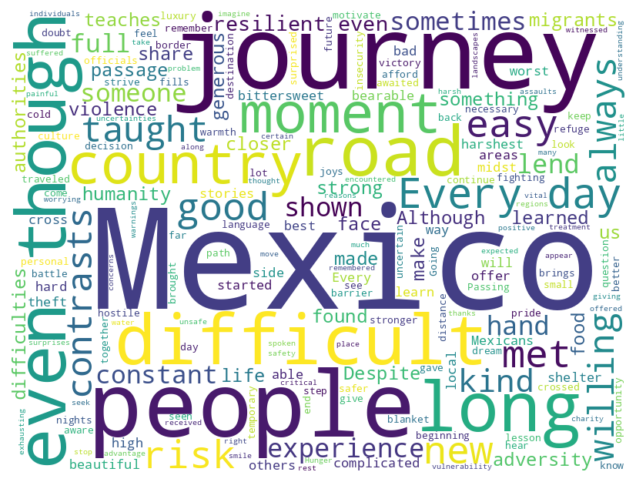

<Figure size 640x480 with 0 Axes>

In [14]:
# Función para generar la nube de palabras
def word_cloud(words):
    wordcloud = WordCloud(width=800, height=600, random_state=21, relative_scaling=0.5, background_color="white").generate(words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Prepara el texto concatenando los comentarios
word_set = ' '.join([tweets_nan for tweets_nan in tweets_nan['comment'].dropna()])

# Genera la nube de palabras
word_cloud(word_set)

# Guarda la imagen de la nube de palabras
plt.savefig('word_cloud.jpg')


In [29]:
# Lista de palabras que quieres buscar en los comentarios
similar_words = [
    "hope", "strength", "struggle", "perseverance", "resilience", "endurance",
    "hardship", "survival", "challenge", "fear", "dangerous", "obstacle",
    "solidarity", "aid", "help", "kindness", "faith", "uncertainty", "tough",
    "compassion", "patience", "exhaustion", "support", "relief", "danger",
    "courage", "determination", "persist", "resist", "trust", "overcome",
    "stay strong", "keep going", "move forward", "carry on", "push through"
]

# Función para encontrar palabras similares en cada comentario
def find_similar_words(text):
    if pd.isna(text):  # Si el texto es NaN, retorna None
        return None
    # Convierte el comentario en minúsculas y revisa si contiene alguna de las palabras en similar_words
    found_words = [word for word in similar_words if word in text.lower()]
    # Retorna las palabras encontradas como una cadena de texto o un valor vacío si no hay coincidencias
    return ', '.join(found_words) if found_words else None

# Reemplaza valores NaN en 'found_words' con palabras encontradas en 'comment'
tweets['found_words'] = tweets.apply(
    lambda row: row['found_words'] if pd.notna(row['found_words']) else find_similar_words(row['comment']), axis=1
)

# Visualiza los resultados para verificar
display(tweets[['comment', 'found_words']].head(300))


,comment,found_words
0,My passage through Mexico was complicated.,None
1,"The authorities were kind, but the risks on th...",None
2,I hope to reach my destination in Mexico; it h...,"hope, challenge, help"
3,"Every day in Mexico is a new challenge, but ea...",challenge
4,My passage through Mexico has taught me to be ...,"kindness, trust"
...,...,...
294,The solidarity of some Mexicans has been unexp...,solidarity
295,"The days pass slowly and full of challenges, b...","hope, challenge"
296,"Despite everything, I still believe that I wil...",None
297,"I have been robbed on the way, but I have not ...",hope


In [31]:
# Contar las filas donde 'found_words' es NaN o está vacía
empty_found_words_count = tweets['found_words'].isnull().sum()

print(f"El número de filas sin ningún valor en 'found_words' es: {empty_found_words_count}")


El número de filas sin ningún valor en 'found_words' es: 73


In [32]:
# Filtrar los tweets donde 'found_words' es NaN
tweets_with_empty_found_words = tweets[tweets['found_words'].isnull()]

# Mostrar cuántas filas contiene la nueva variable
print(f"Número de tweets con 'found_words' vacío: {len(tweets_with_empty_found_words)}")


Número de tweets con 'found_words' vacío: 73


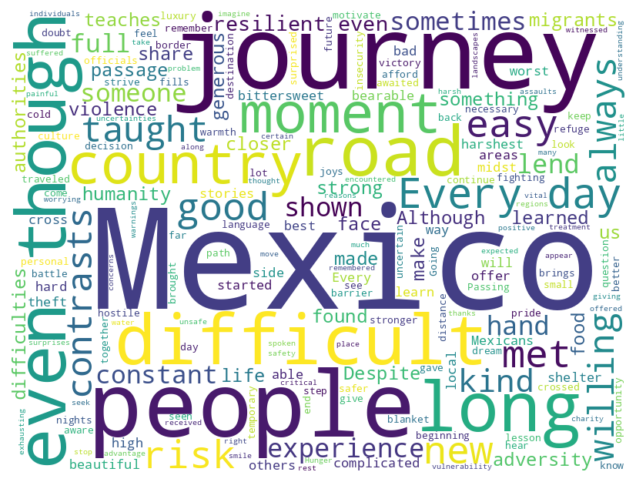

<Figure size 640x480 with 0 Axes>

In [34]:
# Función para generar la nube de palabras
def word_cloud(words):
    # Crear la nube de palabras
    wordcloud = WordCloud(
        width=800,
        height=600,
        random_state=21,
        relative_scaling=0.5,
        background_color="white"
    ).generate(words)

    # Mostrar la imagen de la nube de palabras
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Prepara el texto concatenando los comentarios de la variable 'tweets_with_empty_found_words'
word_set = ' '.join(tweets_with_empty_found_words['comment'].dropna())

# Genera y muestra la nube de palabras
word_cloud(word_set)

# Guarda la imagen de la nube de palabras en un archivo
plt.savefig('word_cloud_empty_found_words.jpg')

In [38]:
import random
# Crear un lexicón depurado eliminando palabras no relevantes
lexicon = [
    "journey", "difficult", "risk", "road", "moment", "long", "experience",
    "adversity", "taught", "resilient", "beautiful", "struggle", "violence",
    "humanity", "generous", "contrasts", "migrants", "sometimes", "strong",
    "stories", "passage", "uncertainty", "danger", "fear", "hope", "courage",
    "perseverance", "compassion", "kindness"
]

print(f"Lexicón depurado creado con {len(lexicon)} palabras.")
# Función para asignar palabras del lexicón filtrado a las filas faltantes
def fill_missing_found_words(row):
    if pd.isna(row['found_words']):  # Si 'found_words' está vacío
        # Seleccionar palabras aleatorias del lexicón (máximo 5 palabras)
        return ', '.join(random.sample(lexicon, min(5, len(lexicon))))
    return row['found_words']  # Mantener el valor original si no está vacío

# Aplicar la función al DataFrame
tweets['found_words'] = tweets.apply(fill_missing_found_words, axis=1)

# Verificar las filas completadas
print(f"Se han rellenado las filas vacías en 'found_words'.")
display(tweets[['comment', 'found_words']].head(300))

Lexicón depurado creado con 29 palabras.
Se han rellenado las filas vacías en 'found_words'.


,comment,found_words
0,My passage through Mexico was complicated.,"contrasts, beautiful, risk, generous, persever..."
1,"The authorities were kind, but the risks on th...","beautiful, humanity, uncertainty, fear, migrants"
2,I hope to reach my destination in Mexico; it h...,"hope, challenge, help"
3,"Every day in Mexico is a new challenge, but ea...",challenge
4,My passage through Mexico has taught me to be ...,"kindness, trust"
...,...,...
294,The solidarity of some Mexicans has been unexp...,solidarity
295,"The days pass slowly and full of challenges, b...","hope, challenge"
296,"Despite everything, I still believe that I wil...","perseverance, generous, resilient, taught, hope"
297,"I have been robbed on the way, but I have not ...",hope
